<h1> <center>   Expresso Churn Prediction Challenge  </center> </h1>

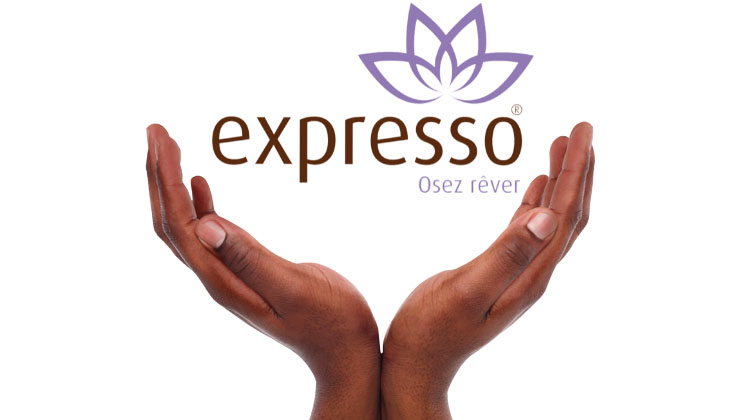

In [41]:
#loading libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from pandas_profiling import ProfileReport
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score
import xgboost as xgb
from xgboost import plot_importance

## Exploration data analysis

### Variables decription


In [50]:
var = pd.read_csv('VariableDefinitions.csv')



 - <b>user id 
 - Region  - the location of each client
 - Tenure - duration in the network
 - Montant - top-up Amount (кол-во средств на счете)
 - MRG - unclear
 - On net - inter expresso call
 - Orange - call to orange
 - regularity - number of times the client is active for 90 days
 - Revenue - montly income of each client
 - Tigo - call to Tigo
 - Top pack the most active packs
 - Zone1 - call to zones1
 - Zone2 - call to Zone2
 - APRU segment - income over 90 days/3. Average revenue of client
 - Data volume - number of connections
 - Freq top pack - number of times the client has activated the top pack packages
 - Frequence - number of times the client has made an income
 - Frequence rech - number of time the customer refilled (пополнил счет)
 
 

In [166]:
var[['Variable Definitions','Unnamed: 2']]

,Variable Definitions,Unnamed: 2
0,NaN,English
1,NaN,The churn dataset includes 19 variables includ...
2,user_id,NaN
3,REGION,the location of each client
4,TENURE,duration in the network
5,MONTANT,top-up amount
6,FREQUENCE_RECH,number of times the customer refilled
7,REVENUE,monthly income of each client
8,ARPU_SEGMENT,income over 90 days / 3
9,FREQUENCE,number of times the client has made an income


### Data analysis and preprocessing

In [167]:
df = pd.read_csv('Train.csv')

In [168]:
df.shape

(2154048, 19)

In [170]:
df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [171]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [172]:
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix

In [173]:
#Pandas Profiling provides a quicklook at all the features

#profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)

#in notebook tour of profile

#profile.to_widgets()

In [174]:
#MRG is exessive variable
df.MRG.value_counts()

NO    2154048
Name: MRG, dtype: int64

In [175]:
df.TENURE.value_counts()

K > 24 month     2043201
I 18-21 month      45278
H 15-18 month      26006
G 12-15 month      14901
J 21-24 month      12725
F 9-12 month        9328
E 6-9 month         1839
D 3-6 month          770
Name: TENURE, dtype: int64

In [176]:
def tenure(x):
    'function to encode the Tenure based on the lowest amount of month spent'
    # I think it's better to make a binary encoding. More than 24 month
    if x == 'K > 24 month':
        return 24
    elif x == 'H 15-18 month':
        return 15
    elif x == 'G 12-15 month':
        return 12
    elif x == 'J 21-24 month':
        return 21
    elif x == 'I 18-21 month':
        return 18
    elif x == 'E 6-9 month':
        return 6
    elif x == 'F 9-12 month':
        return 9
    elif x == 'D 3-6 month':
        return 3
    else:
        pass

In [180]:
#Transforming tenure to int format
df['TENURE_VAL'] = df.TENURE.apply(tenure)

In [181]:
df.iloc[:,1:]

,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TENURE_VAL
0,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0,24
1,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1,18
2,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0,24
3,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0,24
4,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154043,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,6,NaN,NaN,0,24
2154044,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,40.0,40.0,NaN,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0,24
2154045,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1,24
2154046,THIES,K > 24 month,10000.0,11.0,7120.0,2373.0,13.0,NaN,0.0,140.0,13.0,NaN,NaN,NO,28,All-net 500F=2000F;5d,12.0,0,24


In [182]:
df.query('FREQ_TOP_PACK == 0')

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TENURE_VAL


In [183]:
df.REGULARITY.value_counts()

1     195162
62    166477
2     118915
3      86027
4      68335
       ...  
31     19547
34     19478
33     19466
35     19451
36     19091
Name: REGULARITY, Length: 62, dtype: int64

In [184]:
df.query('REGULARITY == 1 or REGULARITY == 2')

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TENURE_VAL
6,00002b0ed56e2c199ec8c3021327229afa70f063,LOUGA,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,0,24
10,0000527d276a6ba8b02810cc2c1d60d25e650f5f,DAKAR,K > 24 month,200.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0,24
12,000068fe2aad763fb2667d253fa4c9e19e3b0636,NaN,G 12-15 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,1,12
52,0001b59420394aa028655cfecc56a157671c2b8d,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1,24
54,0001c6f26a2b2a44835e332328b300875e7ff243,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154027,ffff3e920cf98d3118c7992fdb6b41dc072f15fa,THIES,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,1,24
2154029,ffff4c74d128670312b06340668768227306c387,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,2,NaN,NaN,1,24
2154032,ffff56138e6bf8e553514dfb97ee7cbe0f6cc609,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0,24
2154041,ffffd1d48dd02c059c82c70b8793c8dfa3d09593,NaN,K > 24 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,1,NaN,NaN,0,24


In [185]:
a = pd.DataFrame(df.isna().sum() / df.shape[0],colu)
a

NameError: name 'colu' is not defined

In [ ]:
df.isnull().sum()

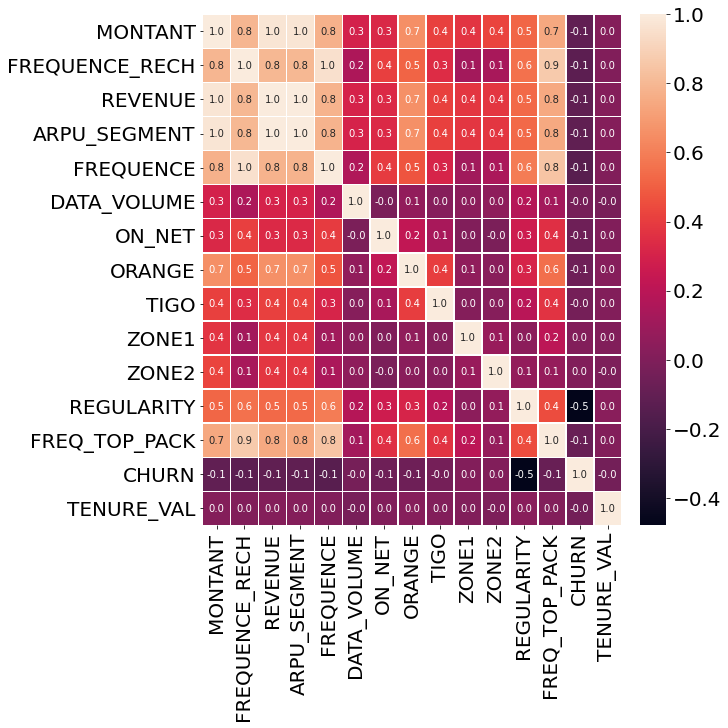

In [186]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(), annot=True ,linewidth=0.5,     fmt='.1f',ax=ax);

#plt.savefig('corr.jpg')

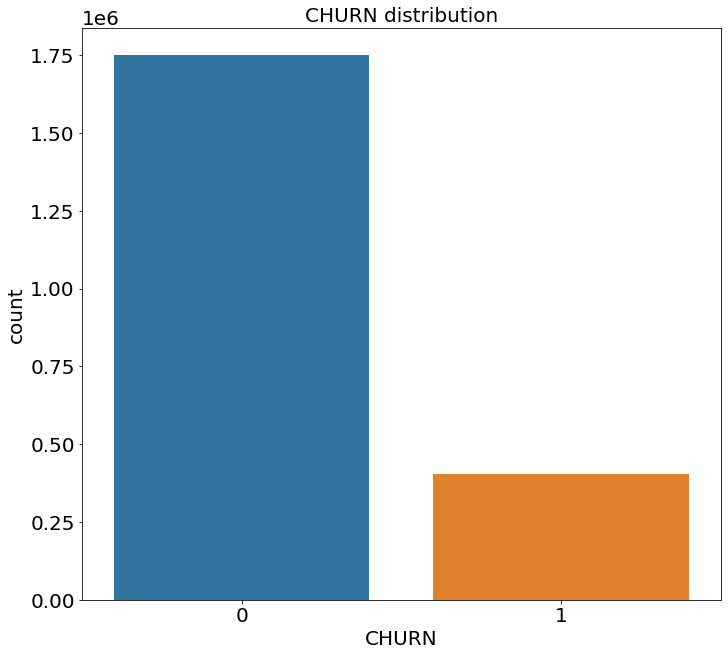

In [187]:
fig, axs = plt.subplots(1,1, figsize=(10, 9),sharex=True)
sns.countplot(x = df['CHURN'] )
axs.set_title('CHURN distribution',fontsize= 20)
plt.yticks(size=20)
plt.xticks(size=20)
axs.yaxis.label.set_size(20)
axs.xaxis.label.set_size(20)

<ipython-input-188-74a4301ce538>:5: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout(pad=10.0)


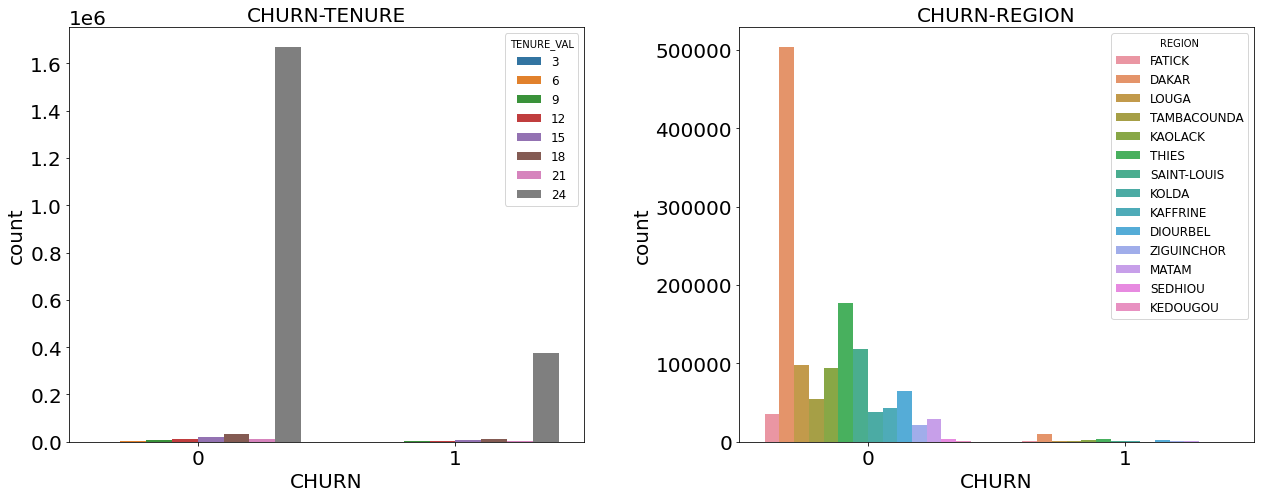

In [188]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend',fontsize=12) 
fig, axs = plt.subplots(1,2, figsize=(20, 9),sharex=True)
fig.tight_layout(pad=10.0)
sns.countplot(x=df['CHURN'], hue=df['TENURE_VAL'],data=df,ax=axs[0])

sns.countplot(x=df['CHURN'], hue=df['REGION'],data=df,ax=axs[1])
axs[0].set_title('CHURN-TENURE',fontsize= 20)
axs[1].set_title('CHURN-REGION',fontsize= 20)
axs[0].yaxis.label.set_size(20)
axs[0].xaxis.label.set_size(20)
axs[1].yaxis.label.set_size(20)
axs[1].xaxis.label.set_size(20)

#sns.countplot(x=df['CHURN'], hue=df['REVENUE'],data=df,ax=axs[2])
#axs[2].set_title('CHURN-REVENUE',fontsize= 20)
#axs[2].yaxis.label.set_size(20)
#axs[2].xaxis.label.set_size(20)
#plt.savefig('statisctic1.jpg')

<ipython-input-189-cd250143ab22>:7: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout(pad=4.0)


<AxesSubplot:xlabel='ON_NET'>

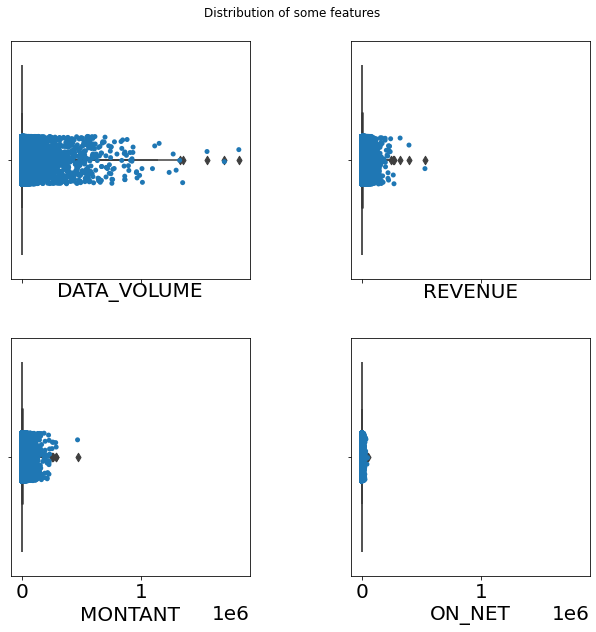

In [189]:
# Data contains a lot of noise. It is better to use a RobustScaler?
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend',fontsize=12) 
plt.rc('axes',labelsize=20) 
fig, axs = plt.subplots(2,2, figsize=(10, 9),sharex=True)
fig.tight_layout(pad=4.0)
fig.suptitle('Distribution of some features')
sns.stripplot(x="DATA_VOLUME", data=df,ax=axs[0,0])
sns.stripplot(x="REVENUE", data=df,ax=axs[0,1])
sns.stripplot(x="MONTANT", data=df,ax=axs[1,0])
sns.stripplot(x="ON_NET", data=df,ax=axs[1,1])
sns.boxenplot(x="DATA_VOLUME", data=df,ax=axs[0,0])
sns.boxenplot(x="REVENUE", data=df,ax=axs[0,1])
sns.boxenplot(x="MONTANT", data=df,ax=axs[1,0])
sns.boxenplot(x="ON_NET", data=df,ax=axs[1,1])
#plt.savefig('Distribution_noise.jpg')

In [190]:
'encode the REGULARITY based on the customer regularity'
def activeness_user(data): 
    if data <= 6:
        return 0
    elif  data >=56:
        return 2
    else:
        return 1
    
df['Activeness'] = df['REGULARITY'].apply(activeness_user)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='CHURN', ylabel='count'>

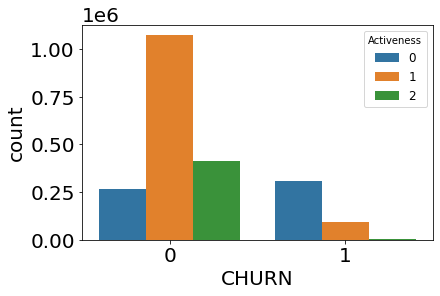

In [191]:
sns.countplot(df.CHURN, hue=df.Activeness)

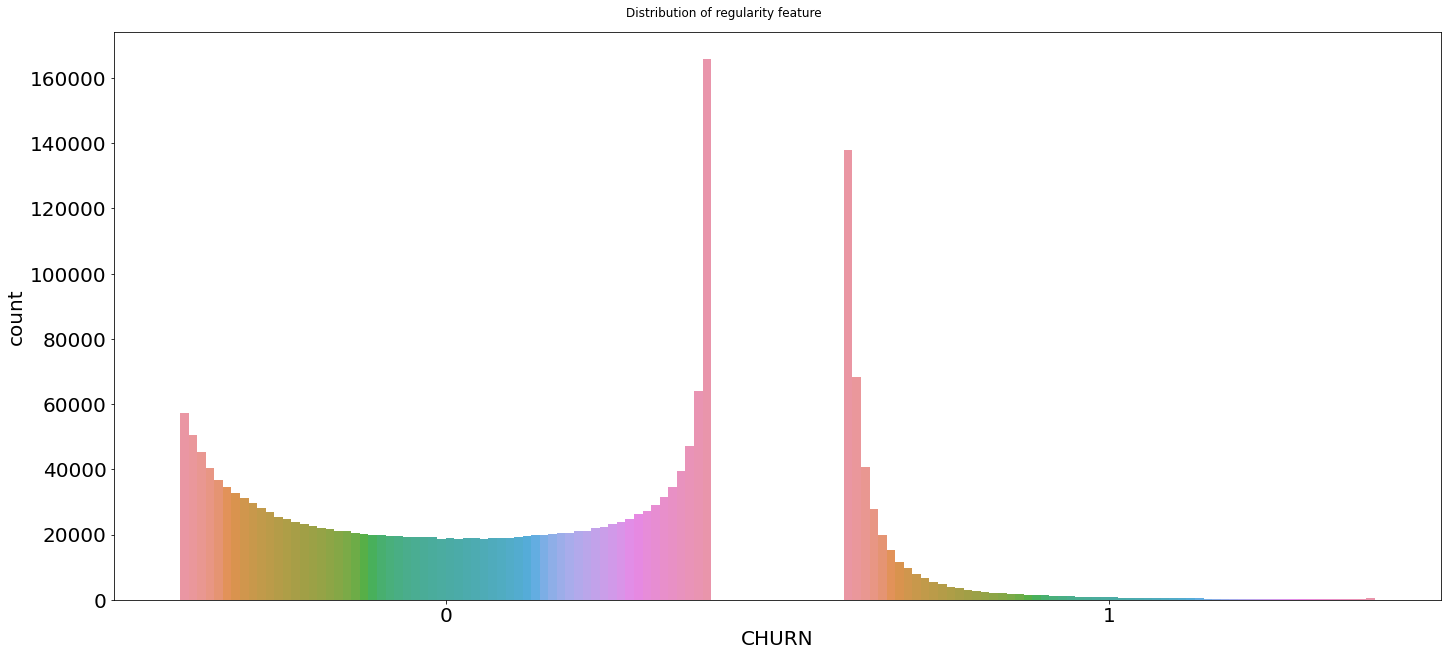

In [192]:
# Loyalty highly depends on Regularity

fig, axs = plt.subplots(1,1, figsize=(20, 9),sharex=True)
fig.suptitle('Distribution of regularity feature')
sns.countplot(x=df['CHURN'], hue=df['REGULARITY'])
axs.get_legend().remove()
#plt.savefig('regularity.jpg')

In [193]:
df.TOP_PACK = df.TOP_PACK.fillna('others')

TOP_PACK_only = df[df['TOP_PACK'] != "others"]
no_PACK = df[df['TOP_PACK'] == "others"]

<ipython-input-194-444d7d58b560>:6: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  fig.tight_layout()


Text(0.5, 1.0, 'NO_PACK_users-CHURN')

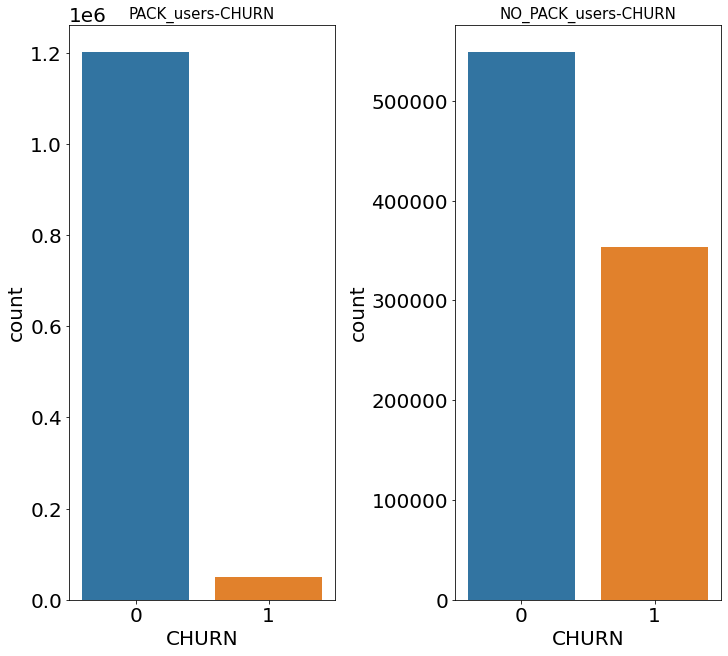

In [194]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend',fontsize=12) 
plt.rc('axes',labelsize=20) 
plt.rcParams['figure.constrained_layout.use'] = True
fig.tight_layout()
# People who use TOP_PACK are more loyal 
fig, axs = plt.subplots(1,2, figsize=(10, 9),sharex=True)
sns.countplot(x=TOP_PACK_only['CHURN'],ax=axs[0])
axs[0].set_title('PACK_users-CHURN',fontsize=15)
sns.countplot(x=no_PACK['CHURN'],ax=axs[1])
axs[1].set_title('NO_PACK_users-CHURN',fontsize=15)
#plt.savefig('Packusers.jpg')

In [195]:
## Montant value
df.TIGO = df.TIGO.fillna(-1)
zero_TIGO = df.query('TIGO == -1')
df.ORANGE = df.ORANGE.fillna(-1)
zero_ORANGE = df.query('ORANGE == -1')

In [196]:
def tigo_encode(x):
    
    if x == -1:
        return 1
    else:
        return 0
    
df['TIG_encode'] = df.TIGO.apply(tigo_encode)
df['Orange_encode'] = df.ORANGE.apply(tigo_encode)

Text(0.5, 0.98, '1 means people called to Orange')

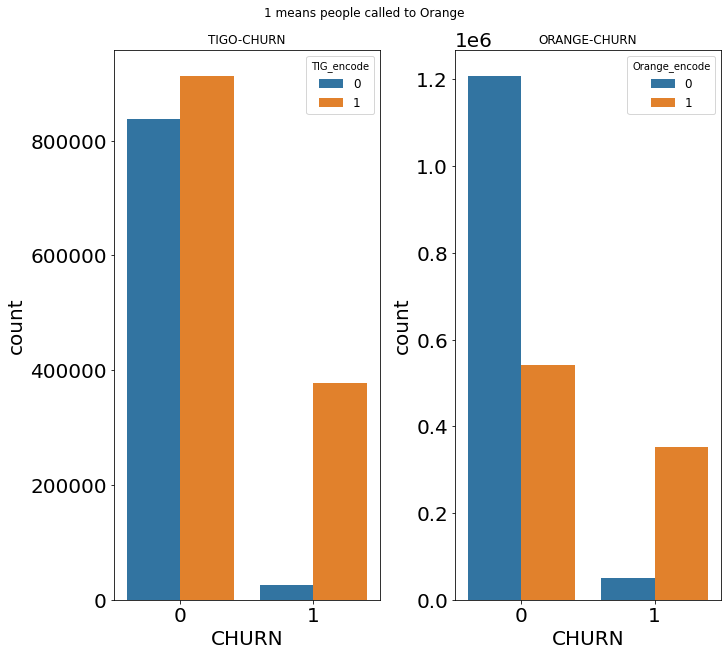

In [197]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend',fontsize=12) 
plt.rc('axes',labelsize=20) 
# It shows that unloyal customers don't usually call to the TIGO
fig, axs = plt.subplots(1,2, figsize=(10, 9),sharex=True)
sns.countplot(x=df['CHURN'],hue=df['TIG_encode'],ax=axs[0])
axs[0].set_title('TIGO-CHURN')

sns.countplot(x=df['CHURN'],hue=df['Orange_encode'],ax=axs[1])
axs[1].set_title('ORANGE-CHURN')

fig.suptitle('1 means people called to Orange')

#plt.savefig('ORANGE_TIGO.jpg')

In [198]:
df.FREQUENCE = df.FREQUENCE.fillna(0)


In [199]:
frequence = df.query('FREQUENCE != 0')

In [200]:
frequence

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,...,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TENURE_VAL,Activeness,TIG_encode,Orange_encode
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,...,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0,24,1,0,0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,...,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0,24,1,0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,...,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0,24,2,0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,...,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0,24,1,1,0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,NaN,252.0,...,NaN,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0,24,2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2154038,ffffb2b8b63959b8a374e2a2ccaf2b9e521879ad,NaN,K > 24 month,1000.0,2.0,1000.0,333.0,2.0,0.0,2.0,...,NaN,NO,12,All-net 500F=2000F;5d,2.0,0,24,1,0,0
2154040,ffffccdae4d9097c20f95e87f5c89845cab4eff3,SAINT-LOUIS,K > 24 month,2000.0,4.0,1997.0,666.0,5.0,0.0,57.0,...,NaN,NO,21,All-net 500F=2000F;5d,2.0,0,24,1,1,0
2154042,ffffd3057e31ff19496a3c00397a9a67d5037c52,DAKAR,K > 24 month,4800.0,4.0,4800.0,1600.0,14.0,7400.0,2.0,...,0.0,NO,62,"Data:1000F=2GB,30d",3.0,0,24,2,1,0
2154044,ffffeaaa9289cdba0ac000f0ab4b48f4aa74ed15,THIES,K > 24 month,6100.0,15.0,5800.0,1933.0,15.0,621.0,26.0,...,NaN,NO,55,"Data: 200 F=100MB,24H",9.0,0,24,1,0,0


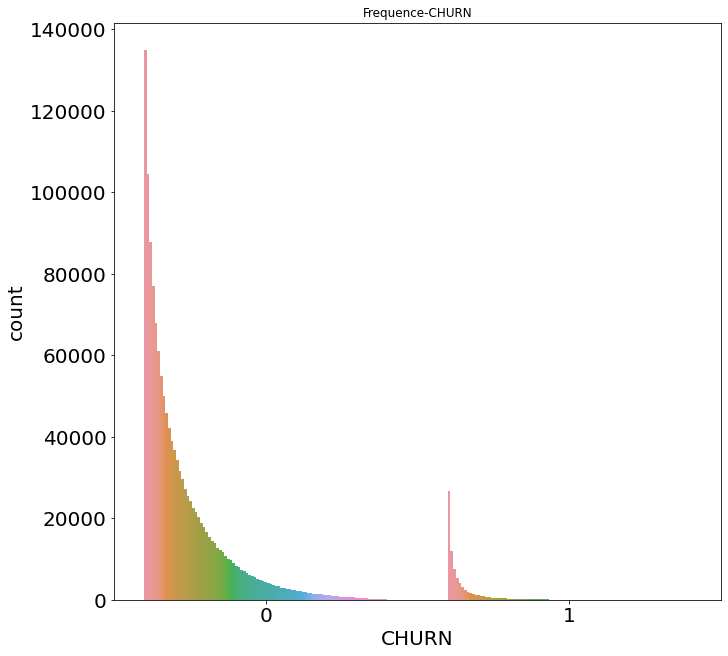

In [201]:
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20)
plt.rc('legend',fontsize=12) 
plt.rc('axes',labelsize=20) 
fig, axs = plt.subplots(1,1, figsize=(10, 9),sharex=True)
sns.countplot(x=frequence['CHURN'],hue=frequence.FREQUENCE)
axs.set_title('Frequence-CHURN')
axs.get_legend().remove()

## Feature generation

In [202]:
# Add another useful features

## make a feature which will correspond tenure and regularity of each user. It must help to find a new users
df['Activeness'] =  df['TENURE_VAL'] / df['REGULARITY']


#df['Revenue_per_montant'] = df['REVENUE'] / df['MONTANT']

# make a weighted frequence of top ups depending on the tenure
df['tenure_to_topup_frequency'] = df['FREQUENCE_RECH'] / df['TENURE_VAL']


df.ON_NET =  df.ON_NET.fillna(0)
df.ZONE1 =  df.ZONE1.fillna(0)
df.ZONE2 =  df.ZONE2.fillna(0)
df.TIGO =  df.TIGO.fillna(0)
# create feature which will tell about the share of on_net calls among all which were made by user

df['on_net_ratio'] = df.ON_NET/(df.ON_NET+df.ORANGE+df.ZONE1+df.ZONE2+df.TIGO)

In [203]:
def DAKAR_citizen(data):
    if data == "DAKAR":
        return 1
    else:
        return 0
df['DAKAR_citizen'] = df.REGION.apply(DAKAR_citizen)

In [204]:
b = df[['on_net_ratio','tenure_to_topup_frequency','Activeness','on_net_ratio','CHURN','TIG_encode','Orange_encode','DAKAR_citizen']].corr()
b

,on_net_ratio,tenure_to_topup_frequency,Activeness,on_net_ratio,CHURN,TIG_encode,Orange_encode,DAKAR_citizen
on_net_ratio,1.000000,0.064830,-0.310520,1.000000,-0.257641,-0.184767,-0.293971,0.023040
tenure_to_topup_frequency,0.064830,1.000000,-0.224009,0.064830,-0.118851,-0.316258,-0.223174,0.141087
Activeness,-0.310520,-0.224009,1.000000,-0.310520,0.550935,0.395810,0.530276,-0.201982
on_net_ratio,1.000000,0.064830,-0.310520,1.000000,-0.257641,-0.184767,-0.293971,0.023040
CHURN,-0.257641,-0.118851,0.550935,-0.257641,1.000000,0.328679,0.446846,-0.241162
TIG_encode,-0.184767,-0.316258,0.395810,-0.184767,0.328679,1.000000,0.622963,-0.241241
Orange_encode,-0.293971,-0.223174,0.530276,-0.293971,0.446846,0.622963,1.000000,-0.252984
DAKAR_citizen,0.023040,0.141087,-0.201982,0.023040,-0.241162,-0.241241,-0.252984,1.000000


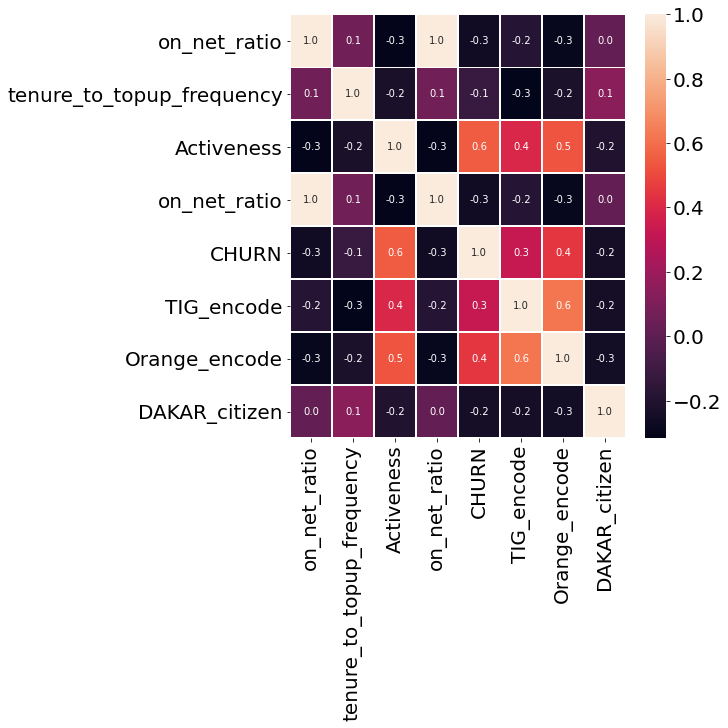

In [205]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(b, annot=True ,linewidth=0.5,     fmt='.1f',ax=ax);

#plt.savefig('new_feature.jpg')

### Build a prepocessing function

In [154]:
TENURE = df.TENURE.apply(tenure)

In [164]:
df.TENURE

0          None
1          None
2          None
3          None
4          None
           ... 
2154043    None
2154044    None
2154045    None
2154046    None
2154047    None
Name: TENURE, Length: 2154048, dtype: object

In [210]:
def new_users(x):
    if x <= 6 :
        return 1
    else:
        return 0
    
def tenure(x):
    'function to encode the Tenure based on the lowest amount of month spent'
    # I think it's better to make a binary encoding. More than 24 month
    if x == 'K > 24 month':
        return 24
    elif x == 'H 15-18 month':
        return 15
    elif x == 'G 12-15 month':
        return 12
    elif x == 'J 21-24 month':
        return 21
    elif x == 'I 18-21 month':
        return 18
    elif x == 'E 6-9 month':
        return 6
    elif x == 'F 9-12 month':
        return 9
    elif x == 'D 3-6 month':
        return 3
    else:
        pass
'encode the REGULARITY based on the customer regularity'
def low_active_user(data): 
    if data <= 6:
        return 1
    else:
        return 0
    
def high_active_user(data):
    if data >=56:
        return 1
    else:
        return 0
def DAKAR_citizen(data):
    if data == "DAKAR":
        return 1
    else:
        return 0
    
def tigo_encode(x):
    
    if x == -1:
        return 1
    else:
        return 0
    

    
    
def preprocess(data):
    
    # imputing missing data
    data.FREQUENCE = data.FREQUENCE.fillna(0)
    data.ON_NET =  data.ON_NET.fillna(0)
    data.MONTANT =  data.MONTANT.fillna(0)
    data.TOP_PACK = data.TOP_PACK.fillna('others')
    
    data.REVENUE =  data.REVENUE.fillna(0)
    data.FREQUENCE_RECH =  data.FREQUENCE_RECH.fillna(0)
    
    data['REGION'] = data['REGION'].fillna('Missing')
    data['FREQUENCE_RECH'] = data['FREQUENCE_RECH'].fillna(0)
    data['DATA_VOLUME'] = data['DATA_VOLUME'].fillna(0)
    
    data['ARPU_SEGMENT'] = data['ARPU_SEGMENT'].fillna(0)
    
    data.ORANGE =  data.ORANGE.fillna(0)
    data.ON_NET =  data.ON_NET.fillna(0)
    data.ZONE1 =  data.ZONE1.fillna(0)
    data.ZONE2 =  data.ZONE2.fillna(0)
    data.TIGO =  data.TIGO.fillna(0)
    
    data.FREQ_TOP_PACK =  data.FREQ_TOP_PACK.fillna(0)
    # create feature which will tell about the share of on_net calls among all which were made by user

    data['on_net_ratio'] = data.ON_NET/(data.ON_NET+data.ORANGE+data.ZONE1+data.ZONE2+data.TIGO)
    data['on_net_ratio'] = data['on_net_ratio'].fillna(-1)
    ## make a feature which will correspond tenure and regularity of each user. It must help to find a new users
    




   
    #Dakar citizen
    data['DAKAR_citizen'] = data.REGION.apply(DAKAR_citizen)
    
   
    data['TENURE_VAL'] = data.TENURE.apply(tenure)
    
    data['Activeness'] =  data['TENURE_VAL'] / data['REGULARITY']
     # make a weighted frequence of top ups depending on the tenure
    data['tenure_to_topup_frequency'] = data['FREQUENCE_RECH'] / data['TENURE_VAL']
    
    #вот эти фичи спортные. Так как есть фича-активность
    data['active_user'] = data.REGULARITY.apply(high_active_user)
    data['low_active_user'] = data.REGULARITY.apply(low_active_user)
    
    
    data['DAKAR_citizen'] = data.REGION.apply(DAKAR_citizen)
    data['New_user'] = data.TENURE_VAL.apply(new_users)
    # TIGO and ORANGE encoded
    data['TIG_encode'] = data.TIGO.apply(tigo_encode)
    data['Orange_encode'] = data.ORANGE.apply(tigo_encode)
     # select target variable
    y = data.CHURN
    # Drop exessive features
    data = data.drop(columns = ['CHURN','ZONE1','ZONE2','MRG','user_id','REGION','TOP_PACK','TENURE'])
    
    return data,y

In [211]:
x,y = preprocess(df)

In [212]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 21 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   MONTANT                    float64
 1   FREQUENCE_RECH             float64
 2   REVENUE                    float64
 3   ARPU_SEGMENT               float64
 4   FREQUENCE                  float64
 5   DATA_VOLUME                float64
 6   ON_NET                     float64
 7   ORANGE                     float64
 8   TIGO                       float64
 9   REGULARITY                 int64  
 10  FREQ_TOP_PACK              float64
 11  TENURE_VAL                 int64  
 12  Activeness                 float64
 13  TIG_encode                 int64  
 14  Orange_encode              int64  
 15  tenure_to_topup_frequency  float64
 16  on_net_ratio               float64
 17  DAKAR_citizen              int64  
 18  active_user                int64  
 19  low_active_user            int64  
 20  Ne

In [213]:
## Data has a lot of noise. RobustScaler?

MONTANT                      0
FREQUENCE_RECH               0
REVENUE                      0
ARPU_SEGMENT                 0
FREQUENCE                    0
DATA_VOLUME                  0
ON_NET                       0
ORANGE                       0
TIGO                         0
REGULARITY                   0
FREQ_TOP_PACK                0
TENURE_VAL                   0
Activeness                   0
TIG_encode                   0
Orange_encode                0
tenure_to_topup_frequency    0
on_net_ratio                 0
DAKAR_citizen                0
active_user                  0
low_active_user              0
New_user                     0
dtype: int64